In [76]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#making it show all columns
pd.set_option('display.max_columns', None)

- Preparing our data

In [77]:
df = pd.read_csv("/home/thiago/data_lol/cblol/data/cblol2024_1_players.csv")

In [78]:
df.head(5)

,Player,Team,Pos,GP,W%,CTR%,K,D,A,KDA,KP,KS%,DTH%,FB%,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,D%P15,EGPM,GOLD%,STL,WPM,CWPM,WCPM
0,Aegis,RED Canids,Jungle,18,67%,56%,46,64,163,3.3,73.6%,16.2%,29.8%,50%,69,27,0.9,5.8,18.1%,325,13.7%,14.1%,209,17.9%,1,0.33,0.24,0.30
1,Aithusa,INTZ,Middle,18,17%,33%,54,64,99,2.4,78.5%,27.7%,20.1%,22%,-241,-104,-6.9,7.6,25.1%,654,29.3%,30.2%,241,23.3%,0,0.49,0.24,0.25
2,Ayu,FURIA,ADC,18,22%,33%,65,41,77,3.5,68.9%,31.6%,14.1%,17%,119,180,5.8,9.0,29.9%,492,24.5%,25.5%,280,25.8%,0,0.42,0.19,0.28
3,Brance,RED Canids,ADC,18,67%,44%,111,35,103,6.1,75.4%,39.1%,16.3%,33%,236,157,4.9,9.1,30.8%,767,32.0%,34.2%,328,28.0%,0,0.52,0.15,0.46
4,CarioK,paiN Gaming,Jungle,18,61%,39%,34,53,172,3.9,73.8%,12.2%,23.3%,56%,65,68,-0.7,5.3,14.7%,291,12.3%,12.2%,194,16.3%,3,0.45,0.32,0.40


In [79]:
# filtering games played to more than 6
df = df[df.GP > 6]

In [80]:
# creating a dataframe per lane
df_top = df[df.Pos == 'Top']
df_jungle = df[df.Pos == 'Jungle']
df_mid = df[df.Pos == 'Middle']
df_adc = df[df.Pos == 'ADC']
df_sup = df[df.Pos == 'Support']

#testing
df_sup.head()

,Player,Team,Pos,GP,W%,CTR%,K,D,A,KDA,KP,KS%,DTH%,FB%,GD10,XPD10,CSD10,CSPM,CS%P15,DPM,DMG%,D%P15,EGPM,GOLD%,STL,WPM,CWPM,WCPM
5,Cavalo,Liberty,Support,18,50%,56%,17,71,130,2.1,70.7%,8.2%,26.0%,11%,-114,-168,5.0,2.0,5.2%,172,8.4%,7.9%,131,11.5%,0,1.63,0.44,0.56
7,Ceos,KaBuM! Esports,Support,18,56%,33%,13,47,159,3.7,74.5%,5.6%,24.2%,28%,-101,125,-0.3,1.5,3.8%,165,7.5%,6.5%,119,10.4%,0,1.87,0.48,0.49
9,Damage,INTZ,Support,18,17%,50%,14,70,141,2.2,79.5%,7.2%,21.9%,33%,-50,-259,-5.2,1.3,3.1%,176,8.6%,7.9%,108,10.4%,0,1.81,0.48,0.36
19,kabbie,Los Grandes,Support,18,50%,50%,10,47,169,3.8,74.6%,4.2%,21.8%,28%,122,132,4.8,1.7,4.2%,215,10.4%,9.6%,119,10.4%,0,2.33,0.51,0.44
22,Kuri,paiN Gaming,Support,18,61%,39%,12,38,203,5.7,77.1%,4.3%,16.7%,28%,47,155,4.1,1.4,3.0%,182,7.6%,6.8%,126,10.5%,0,1.95,0.44,0.35


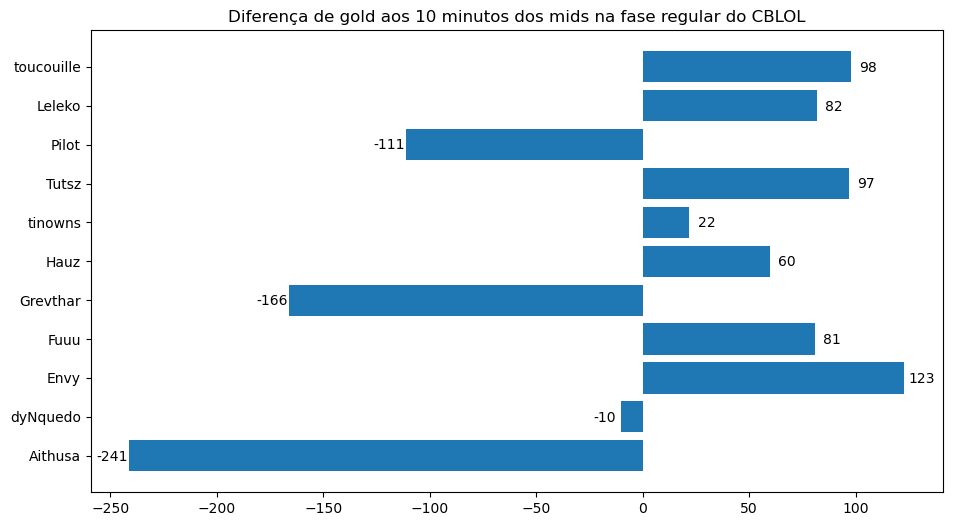

In [129]:
plt.subplots(figsize=(11, 6))
bars = plt.barh(df_mid.Player, df_mid.GD10)

for bar in bars:
    width = bar.get_width()
    if (width > 0):
        plt.text(
            width + 8,
            bar.get_y() + bar.get_height() / 4,
            f'{width}',
            ha = 'center',
            va = 'bottom',
        )
    else:
        plt.text(
        width - 8,
        bar.get_y() + bar.get_height() / 4,
        f'{width}',
        ha = 'center',
        va = 'bottom',
        )

plt.title('Diferença de gold aos 10 minutos dos mids na fase regular do CBLOL')
plt.show()